# Web Scraping del Bcrp 

### Llamamos a las siguientes librerías 

In [64]:
# pip install mplcyberpunk
# conda install mplcyberpunk

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # gráficos

# Se usan para realizar el web scraping
import requests 
from io import StringIO

import warnings
warnings.filterwarnings('ignore')

# Una mejor vizualización de los datos
import mplcyberpunk
plt.style.use("cyberpunk")

### Realizamos el siguiente código

In [68]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01271PM/csv/2000-1/2019-12"
content = requests.get(url,verify=False).text.replace("<br>","\n").strip()
csv =  StringIO(content)
r = pd.read_csv(csv)
r.head()

,Mes/A&ntilde;o,&Iacute;ndice de precios Lima Metropolitana (var% mensual) - IPC
0,Ene.2000,0.069305
1,Feb.2000,0.480130
2,Mar.2000,0.541258
3,Abr.2000,0.511596
4,May.2000,0.016761


In [69]:
r.index = pd.date_range(start ='2000-01-01', freq ='M', periods = len(r)) 
r= r.iloc[:,1]

In [70]:
r.columns= ["IPC"]

In [71]:
r.head()

2000-01-31    0.069305
2000-02-29    0.480130
2000-03-31    0.541258
2000-04-30    0.511596
2000-05-31    0.016761
Freq: M, Name: &Iacute;ndice de precios Lima Metropolitana (var% mensual) - IPC, dtype: float64

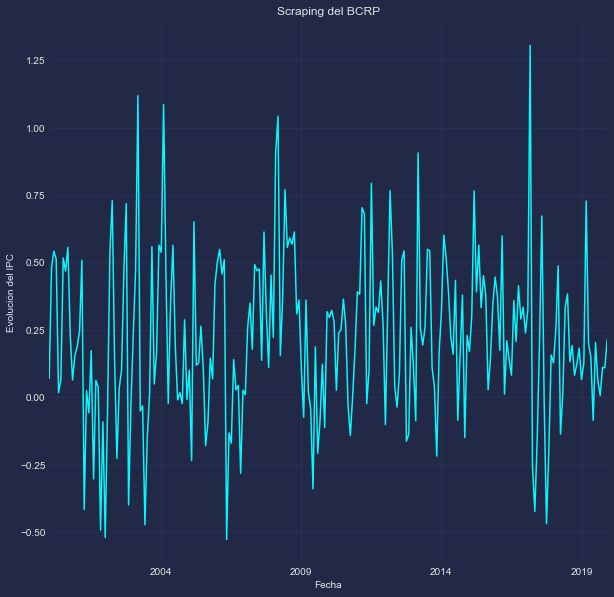

In [72]:
plt.figure(figsize=(10,10))
r.plot()
plt.title("Scraping del BCRP")
plt.xlabel("Fecha")
plt.ylabel("Evolución del IPC")
plt.show()

### Creación de una función 

In [73]:
def webscr_bcrp(codigo,start,end):
    url="https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"+codigo+"/"+"csv/"+start+"/"+end
    content = requests.get(url,verify=False).text.replace("<br>","\n").strip()
    csv =  StringIO(content)
    r = pd.read_csv(csv)
    return(r)

In [74]:
ata=webscr_bcrp(codigo="PN01271PM",start="2015-1",end="2016-2")

In [75]:
ata

,Mes/A&ntilde;o,&Iacute;ndice de precios Lima Metropolitana (var% mensual) - IPC
0,Ene.2015,0.170296
1,Feb.2015,0.303469
2,Mar.2015,0.764664
3,Abr.2015,0.390506
4,May.2015,0.564365
5,Jun.2015,0.332341
6,Jul.2015,0.450786
7,Ago.2015,0.377226
8,Sep.2015,0.027538
9,Oct.2015,0.142799


In [76]:
ata=webscr_bcrp(codigo="PN01206PM",start="2000-1",end="2020-2")
ata.head()

,Mes/A&ntilde;o,Tipo de cambio - promedio del periodo (S/ por US$) - Interbancario - Venta
0,Ene.2000,3.500867
1,Feb.2000,3.456605
2,Mar.2000,3.444209
3,Abr.2000,3.480178
4,May.2000,3.505023
